<div class="alert alert-block alert-success">
    
### GEOG5995: Programming for Social Science: Core Skills- Final Project
# Spatial Analysis of Solar Power Plants and Potential Solar Power and 
# Feasibility of Increasing the Capaciy of Solar Power Plants in the UK
### Student ID: 201786265

<div class="alert alert-block alert-warning">
    
Consider the *__<font color='green'>GREEN</font>__* markups as the essay.
    
<b>Word Count:</b> <u><i>1469</i></u> words.

<div class="alert alert-block alert-danger">


Please follow the instructions provided in the README.txt file to activate the respective virtual environment (GEOG5995_Final_201786265_env). Otherwise, you may need to manually install the required packages or modules with the specified versions from the requirements.txt file (via pip, conda install, etc.), ir even in this notebook using the following instructions:

In [1]:
# If you want to install the packages in this Jupyter notebook, uncomment the bellow commands and run the cell.
# pip install numpy==1.24.3
# pip install pandas==1.5.3
# pip install geopandas==0.14.1
# pip install seaborn==0.12.2
# pip install geoplot==0.5.1
# pip install rasterio==1.3.9

# or uncomment and use the following single line command.
# pip install numpy==1.24.3 pandas==1.5.3 geopandas==0.14.1 seaborn==0.12.2 geoplot==0.5.1 rasterio==1.3.9

# Equivalently, you can use the requirements.txt file, which contains the packages along their versions.
# pip install -r requirements.txt

<div class="alert alert-block alert-success">

# 1. Introduction
In this analysis, we use the global power plant dataset and the solar energy potential raster file, along with the counteries lowres geo dataset to explore how effectively the solar power plants are placed within the UK, considering the solar irradiation. The intended audiences are policy makers, for whom we also explore the possibility of increasing the capacity of solar power generation, which can substitute thermal power plants, and accordingly slow down the climate change by reducing CO<sub>2</sub> emission, and accordingly temperature of the atmosphere. For this purpose, priority of suitability of color palettes is given to clear and comprehendible representation of the results, with compatibility for CVD requirements, if possible.

In the rest of this section, the utilised datasets are described.

<div class="alert alert-block alert-success">

## 1.1. The Global Power Plant Dataset
### 1.1.1. Description
The global power plant dataset is a comprehensive, open source dataset of power plants around the world. It centralises power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The dataset covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type.
### 1.1.2. Columns
Among the 24 columns of this dataset, the followings are of interest to us:
- country_long: the name of the country within which the power plant is placed.
- primary_fuel: the primary fuel used in the power plant.
- capacity_mw: the capacity of the power plant in megawatts.
- latitude: the lattitude on wich the power plant resides.
- longitude: the longitude on which the power plant resides.

### 1.1.3. Source
https://datasets.wri.org/dataset/globalpowerplantdatabase

### 1.1.4. Citation
Global Energy Observatory, Google, KTH Royal Institute of Technology in Stockholm, Enipedia, World Resources Institute. 2018. Global Power Plant Database. Published on Resource Watch and Google Earth Engine; http://resourcewatch.org/ https://earthengine.google.com/

<div class="alert alert-block alert-success">

## 1.2. The Solar Energy Potential Raster File
### 1.2.1 Description
The solar energy potential dataset is made up of three GeoTIFF layers: yearly average daily global horizontal irradiation (GHI), global irradiation for optimally tilted surface (GTI), and photovoltaic power potential (PVOUT). Data layers are provided in a geographic spatial reference (EPSG:4326). The resolution (pixel size) of solar resource data (GHI and GTI,) is 9 arcsec (nominally 250 m), PVOUT is 30 arcsec (nominally 1 km).

Among the abovementioned tif files, the PVOUT raster file (satellite image with a coordinate system) is of interest to us, which indicates the amount of solar irradiation that can be converted to energy. 
PVOUT is a key metric used in the field of solar energy and renewable energy planning.

### 1.2.3. Columns
Raster files don't have columns. The meta-data, and values included in this raster file are axplained in [Section 4](#4-SolarPlantVisualisation).
    
### 1.2.3. Source
https://globalsolaratlas.info/download/world

### 1.2.2. Citation
Global Solar Atlas. 2018. Retrieved from http://globalsolaratlas.info/. Accessed through Resource Watch, (date). https://www.resourcewatch.org.

<div class="alert alert-block alert-success">

## 1.3. The Countries Lowres Dataset
### 1.3.1. Description
This dataset, which is in the format of an shp file, along some other shape formats, includes cultural vectors representing the administrative boundaries (polygons or multi-polygons) of countries at a 10-meter resolution.
### 1.3.2. Columns
- ADMIN: the name of the country.
- geometry: the geometric representation of countries (polygons or multi-polygons)
### 1.3.3. Source
https://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-admin-0-countries/

<div class="alert alert-block alert-success">

# 2. Initialisation

## 2.1. Importing Packages
In order to use the packages they must be imported first.

In [2]:
# For manupulating (numerical) arrays with vectorised operations.
import numpy as np

# For analysis and manipulation of regular datasets.
import pandas as pd

# For creating general visualisations.
import matplotlib.pyplot as plt
import matplotlib.style as style

# For geospatial analysis and working with shp files.
import geopandas as gpd

# For creating statistical visualisations.
import seaborn as sns

# For creating geographical visualisations.
import geoplot as gplt

# For reading and manipulating raster files (with tif format).
import rasterio
from rasterio.mask import mask
from rasterio.plot import show
from rasterio.features import geometry_mask


In [3]:
# Warning removal (this was only added at the final stage).
# Regarding calculating the mean of potential solar power in each grid np.nanmean was used, 
# which raises a warning when all values are nan. 
# The nan values were converted to zero only after the calculations to not tamper with the average, 
# being sensible to outliers and easily influenced by many zeros.

import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-success">

## 2.2. Loading the Power Plant Dataset

In [4]:
# Defining the file path for the power plant data set.
# r in front of the file path indicates that the given string should be considered as a raw string, that is, 
# the '\' should not be considered as a pass argument. Otherwise, we should either use two consecutive backslashes
# as '\\' or one forward slash, '/', instead.
power_plants_file_path = \
r"data\globalpowerplantdatabasev120\global_power_plant_database.csv"

# loading the previously specified comma spearated values (CSV) file into the power_plants_df pandas data frame.
power_plants_df = pd.read_csv(power_plants_file_path)

# Showing the number of rows and columns in the power_plants_df.
print(f"The power_plants_df pandas data frame consists of: \n\
# {power_plants_df.shape[0]} rows, \n\
and \n\
# {power_plants_df.shape[1]} columns.")

The power_plants_df pandas data frame consists of: 
# 29910 rows, 
and 
# 24 columns.


In [5]:
# Printing the columns of the 'power_plants_df' data frame.
print("The power_plants_df data frame has the following columns:")
for ind, column in enumerate(power_plants_df, start=1):
    print(f"{ind})", column)

The power_plants_df data frame has the following columns:
1) country
2) country_long
3) name
4) gppd_idnr
5) capacity_mw
6) latitude
7) longitude
8) primary_fuel
9) other_fuel1
10) other_fuel2
11) other_fuel3
12) commissioning_year
13) owner
14) source
15) url
16) geolocation_source
17) wepp_id
18) year_of_capacity_data
19) generation_gwh_2013
20) generation_gwh_2014
21) generation_gwh_2015
22) generation_gwh_2016
23) generation_gwh_2017
24) estimated_generation_gwh


In [6]:
# Showing nrows random rows from 'power_plants_df' data frame, with the specified columns.
# nrows represents the number of rows to be shown.
nrows = 7

# Instead of using np.random.randint() we create an object from the numpy.random.default_rng class, 
# which uses the new "PCG64" generator as its BitGenerator. 
# We also use a seed value (65421) for the random generator.
# These steps are necessary for consistency, future compatibility, better preformance, and 
# reproducibility of the results.
rng = np.random.default_rng(seed=65421)
power_plants_df.loc[
    np.sort(rng.integers(0, power_plants_df.shape[0], nrows)), 
    ['country_long', 'name', 'primary_fuel', 'capacity_mw', 'latitude', 'longitude', ]
]


,country_long,name,primary_fuel,capacity_mw,latitude,longitude
782,Austria,Mayrhofen,Hydro,355.0,47.1581,11.8501
7636,China,Yingzidu Dam,Hydro,360.0,26.5829,106.1379
19150,United Kingdom,Forss,Wind,2.0,58.5927,-3.5259
19741,United Kingdom,Loch Gair,Hydro,6.0,56.0696,-5.3294
21126,United States of America,Anclote,Gas,1112.4,28.1844,-82.7886
26042,United States of America,NSB Point Lay Utility,Oil,2.4,69.7408,-163.0058
26632,United States of America,Parishville,Hydro,3.0,44.6300,-74.8258


<div class="alert alert-block alert-success">

We want to concentrate on the UK's power plants, therefore, we use the name of the country, 
which is specified in  'country_long' to filter the data.

In [7]:
# Storing the UK power plants for some columns of interest in the UK_power_plants_df pandas data frame.
# reset_index is used to assign new indices to the selected rows.
# drop=True is used to delete the initial indexes, and not put them in a new column.
UK_power_plants_df = power_plants_df.loc[
    power_plants_df['country_long']=='United Kingdom', 
    ['country_long', 'name', 'primary_fuel', 'capacity_mw', 'latitude', 'longitude', ]
].reset_index(drop=True)

# Showing the first n=3 rows of the UK_power_plants_df data farme.
UK_power_plants_df.head(n=3)

,country_long,name,primary_fuel,capacity_mw,latitude,longitude
0,United Kingdom,14 Tullywiggan Road,Biomass,1.000,54.6221,-6.7398
1,United Kingdom,289 Finvoy Road,Solar,5.900,54.9638,-6.4930
2,United Kingdom,30 Acres,Solar,4.965,53.2062,-1.1968


In [8]:
# Obtaining some information regarding the amount of occupied memory, data types, 
# number of rows, and exiestence of null values.
UK_power_plants_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2536 entries, 0 to 2535
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_long  2536 non-null   object 
 1   name          2536 non-null   object 
 2   primary_fuel  2536 non-null   object 
 3   capacity_mw   2536 non-null   float64
 4   latitude      2536 non-null   float64
 5   longitude     2536 non-null   float64
dtypes: float64(3), object(3)
memory usage: 119.0+ KB


<div class="alert alert-block alert-success">

We find out that we don't have any missing values, and the data types are fine for the purpose of this study. 
Nonetheless, for memory efficiency we convert the data types to more proper ones.

In [9]:
# Converting the object dtypes to string dtypes.
UK_power_plants_df = UK_power_plants_df.convert_dtypes()

In [10]:
# We observe that 'float32' is more than enough for the purpose of our analyses.
print(np.finfo(np.float64))
print(np.finfo('float32'))
print(np.finfo(np.float16))

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
nexp =       11   min =        -max
smallest_normal = 2.2250738585072014e-308   smallest_subnormal = 4.9406564584124654e-324
---------------------------------------------------------------

Machine parameters for float32
---------------------------------------------------------------
precision =   6   resolution = 1.0000000e-06
machep =    -23   eps =        1.1920929e-07
negep =     -24   epsneg =     5.9604645e-08
minexp =   -126   tiny =       1.1754944e-38
maxexp =    128   max =        3.4028235e+38
nexp =        8   min =        -max
smallest_normal = 1.1754944e-38   smallest_subnormal = 1.4012985e-45
------------------

In [11]:
# converting the float64 to float16
dest_dtype = 'float32'
UK_power_plants_df = UK_power_plants_df.astype({'capacity_mw': dest_dtype, 'latitude': dest_dtype, 'longitude': dest_dtype})

# Checking the result of dtype conversions.
UK_power_plants_df.dtypes

country_long     string
name             string
primary_fuel     string
capacity_mw     float32
latitude        float32
longitude       float32
dtype: object

<div class="alert alert-block alert-success">

# 3. Data Cleaning and EDA of the Power Plant Dataset

In [12]:
# Acquiring some statistics of the UK_power_plants_df paandas data frame.
UK_power_plants_df.describe()

,capacity_mw,latitude,longitude
count,2536.000000,2536.000000,2536.000000
mean,34.470894,53.162868,-2.379157
std,165.697617,2.115495,1.956408
min,1.000000,50.046501,-8.093000
25%,2.600000,51.517500,-3.729350
50%,5.000000,52.633202,-2.373000
75%,12.300000,54.632774,-1.008475
max,2180.000000,60.192402,1.928400


<div class="alert alert-block alert-success">

## 3.1. Capacity (megawatts)
By a superficial examination  of the quartiles, and the mean and standard deviation of the 'capacit_mw' column, we get suspicious about the capacity of the power plants. 
As a result, we group the data by the primary fuel of plants and examine the same aggregating statistics, plus mode.

In [13]:
# Gouping by the primary fuel of power plants, and aggregating afterwards.
# Since we have to pass functions as aggregates, 
# lambda expressions are used to include the required parameter value for quantiles (percentiles).
groupby_result = UK_power_plants_df.groupby(['primary_fuel']).aggregate(
    {'capacity_mw': [min, 
                     lambda x: np.quantile(x, 0.25), 
                     np.median, 
                     lambda x: np.quantile(x, 0.75), 
                     max, 
                     np.mean, 
                     np.std, 
                     pd.Series.mode, ]
    }
)

# Setting the names of the columns to more descriptive ones.
groupby_result.columns = [
    'Minimum', 
    '1st Quantile', 
    'Median', 
    '3rd Quantile', 
    'Maximum', 
    'Mean', 
    'Standard Deviation', 
    'Mode(s)']

# Showing the result of the aggregations on the gouped by data frame. 
groupby_result

,Minimum,1st Quantile,Median,3rd Quantile,Maximum,Mean,Standard Deviation,Mode(s)
primary_fuel,,,,,,,,
Biomass,1.0,1.50000,2.2,5.000,79.000,6.685185,11.306988,2.0
Coal,230.0,1319.50000,1970.0,2002.000,2012.000,1537.000000,735.036637,"[230.0, 520.0, 1586.0, 1960.0, 1980.0, 2000.0,..."
Cogeneration,32.0,42.50000,65.0,710.000,1404.000,429.428558,613.640464,"[32.0, 35.0, 50.0, 65.0, 180.0, 1240.0, 1404.0]"
Gas,10.0,87.50000,420.0,815.500,2180.000,543.932739,502.301198,56.0
Hydro,1.0,2.00000,3.0,16.750,1800.000,37.134277,179.886388,2.0
Nuclear,955.0,1028.75000,1167.5,1188.250,1230.000,1114.750000,108.997706,"[955.0, 965.0, 1050.0, 1155.0, 1180.0, 1185.0,..."
Oil,3.0,8.70000,16.0,45.000,140.000,33.854546,40.793317,"[8.7, 45.0]"
Solar,1.0,4.14305,5.0,8.205,72.209,7.418588,7.343916,5.0
Waste,1.0,1.60000,2.3,4.100,81.000,5.424611,9.607584,2.0


<div class="alert alert-block alert-success">

We observe that plants with the following primary fuel types are either skewed to right (mode < median < mean), or they have outliers.
- Biomass
- Cogeneration
- Gas
- Hydro
- Oil
- Solar
- Waste
- Wave and Tidal
- Wind

This requires further investigation, for which, we draw their histograms and kernel density estimators. 
Since an sns.histplot with hue='fuel_type' that contains all the histograms and KDEs in one plot would become cluttered, we have drawn each of the histograms in a separate plot.

In [14]:
# For modularisation, we define the hist_kde_plot function for plotting histogram and kde. 
def hist_kde_plot(fuel_type, color='green'):
    """This function plots the histogram and kernel density estimator of the given variable, 
    using the given color, which is by default set to green"""
    
    plt.figure(figsize=(12, 8))
    sns.histplot(
        x=UK_power_plants_df.loc[UK_power_plants_df.primary_fuel == fuel_type, 'capacity_mw'], 
        kde=True,
        color=color
    );
    plt.title("Histogram and KDE of capacity of " + str(fuel_type) + " power plants in megawatts", fontsize=20)
    plt.xlabel("Capacity of " + str(fuel_type) + " power plants (in megawatts)", fontsize=15)
    plt.ylabel("Frequency of " + str(fuel_type) + " power plants", fontsize=15)
    plt.tight_layout()
    plt.show()

In [15]:
# The following style and colours are used for compatibility with the requirements of people with color vision deficiency.
style.use('tableau-colorblind10')

# Defining a dictionary of RGB hex colors that have proven to be compatible with CVD needs.
colors = {
    'blue':    '#377eb8', 
    'orange':  '#ff7f00',
    'green':   '#4daf4a',
    'pink':    '#f781bf',
    'brown':   '#a65628',
    'purple':  '#984ea3',
    'gray':    '#999999',
    'red':     '#e41a1c',
    'yellow':  '#dede00'
}


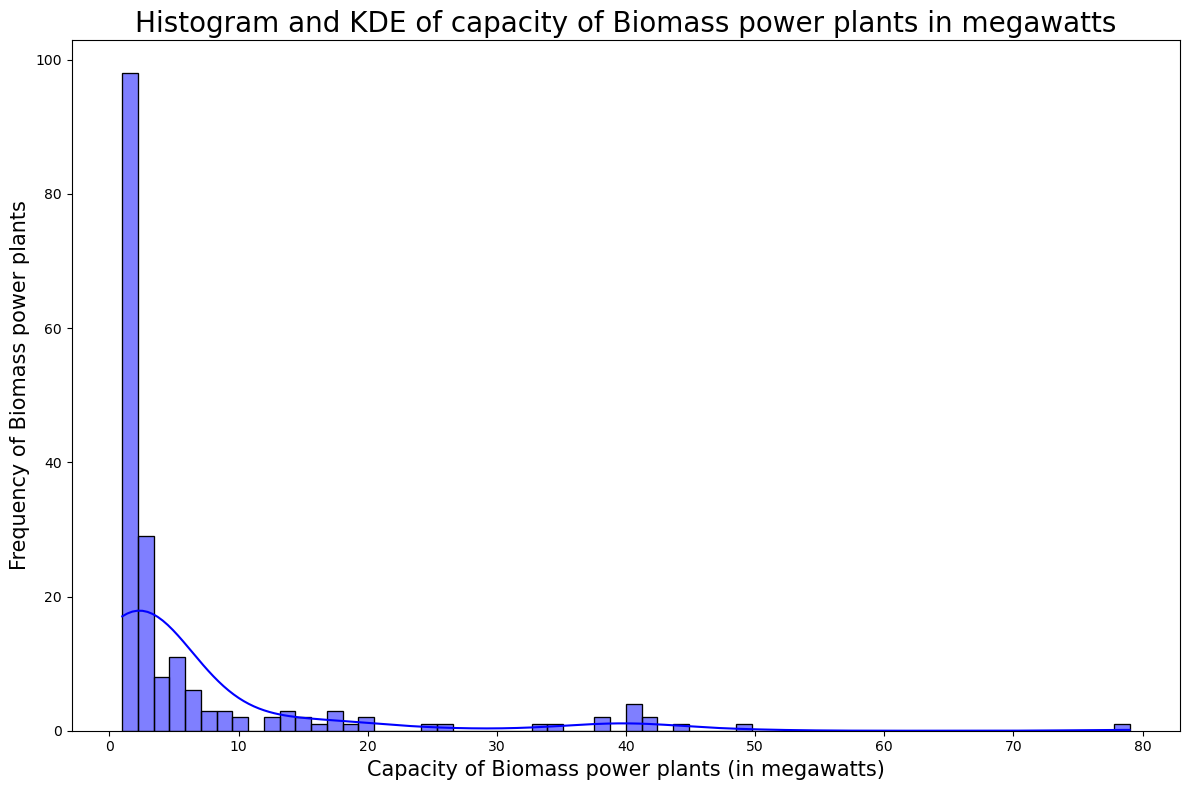

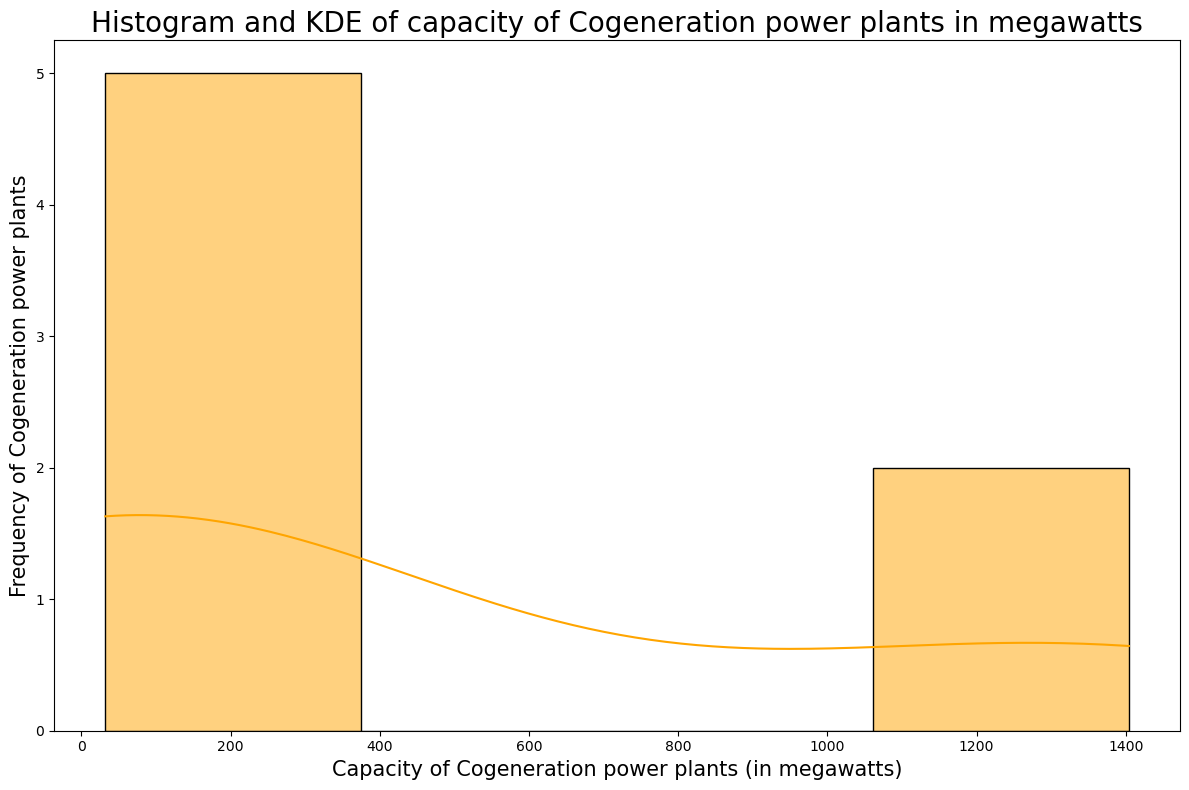

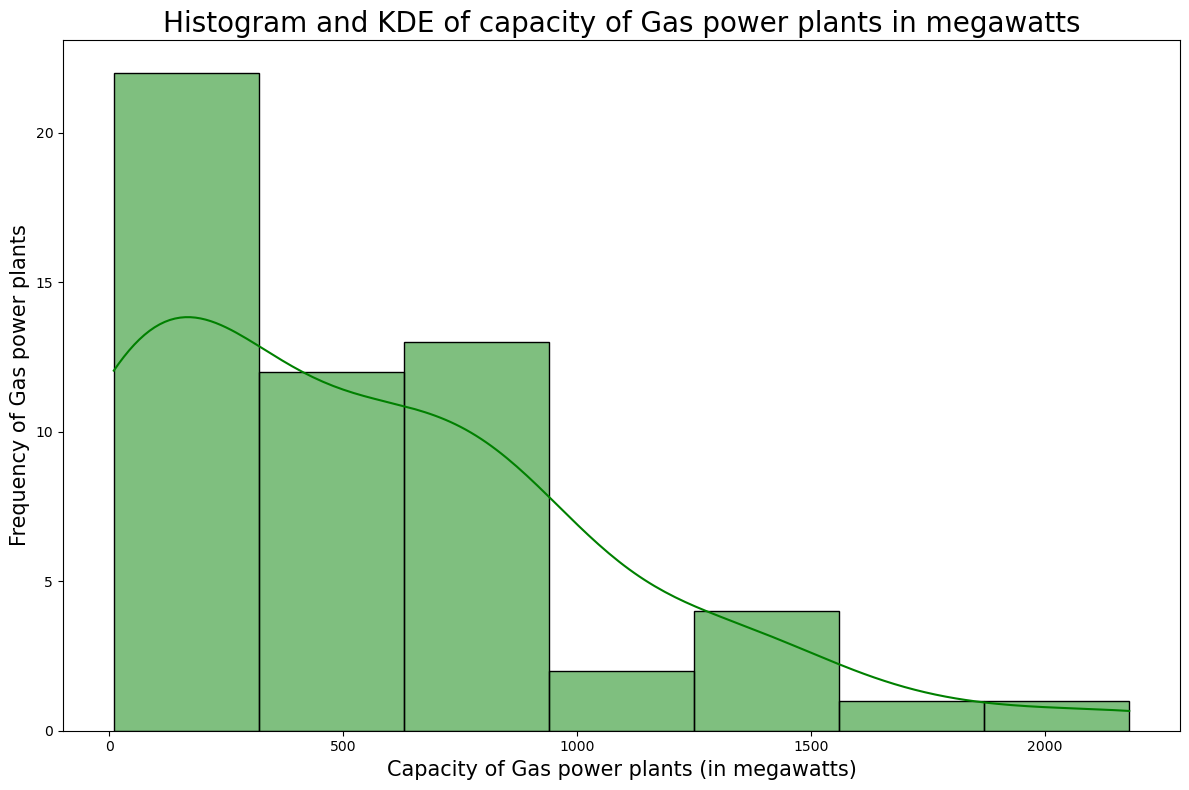

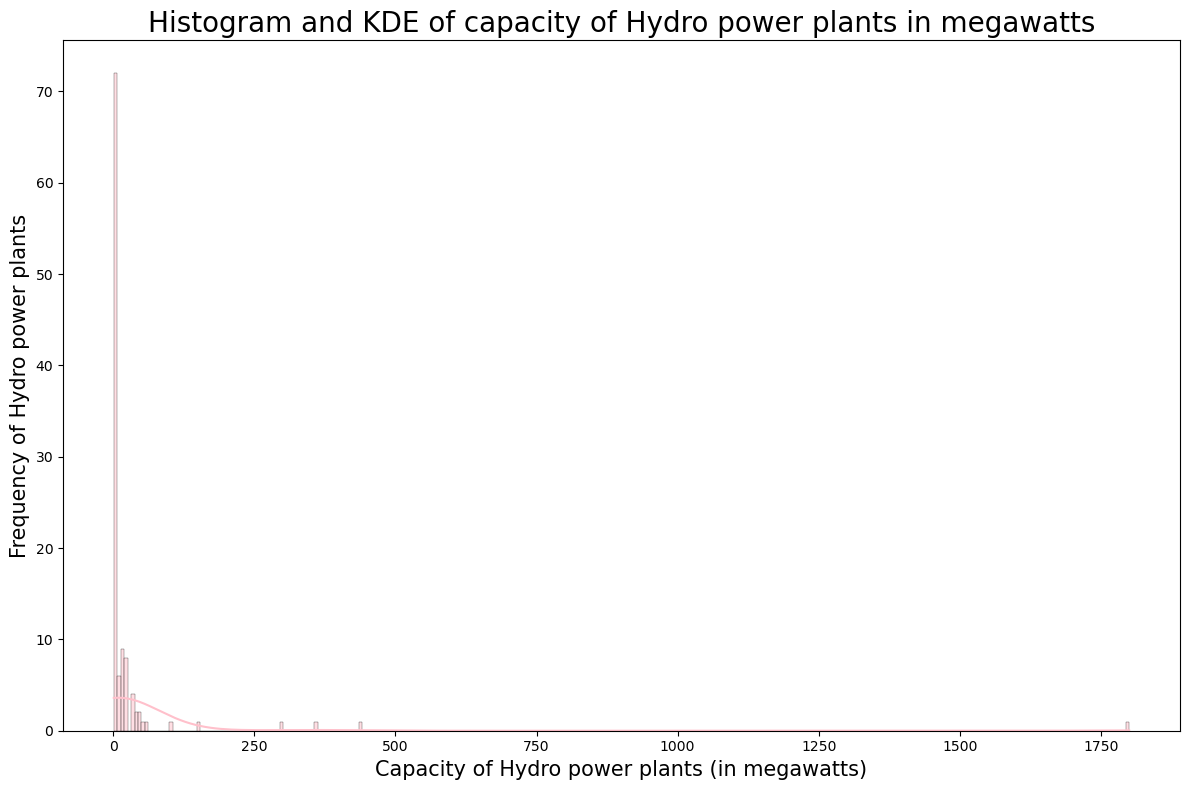

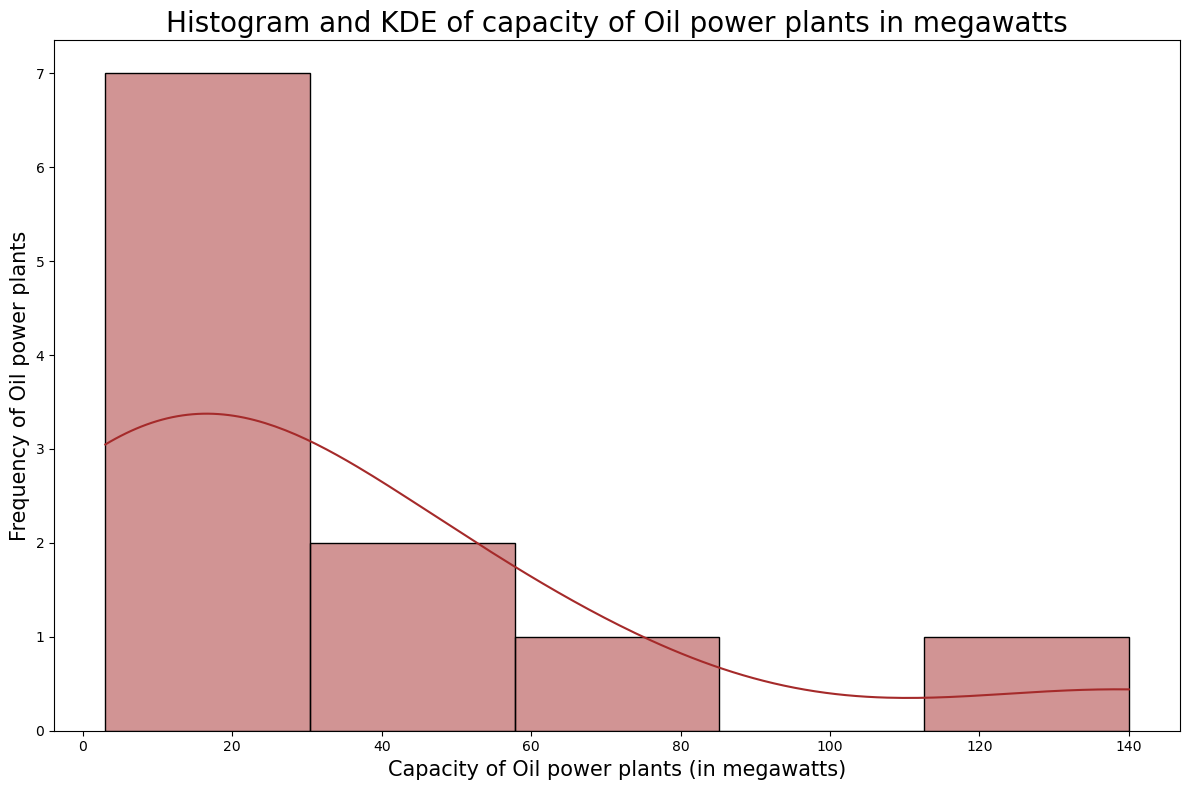

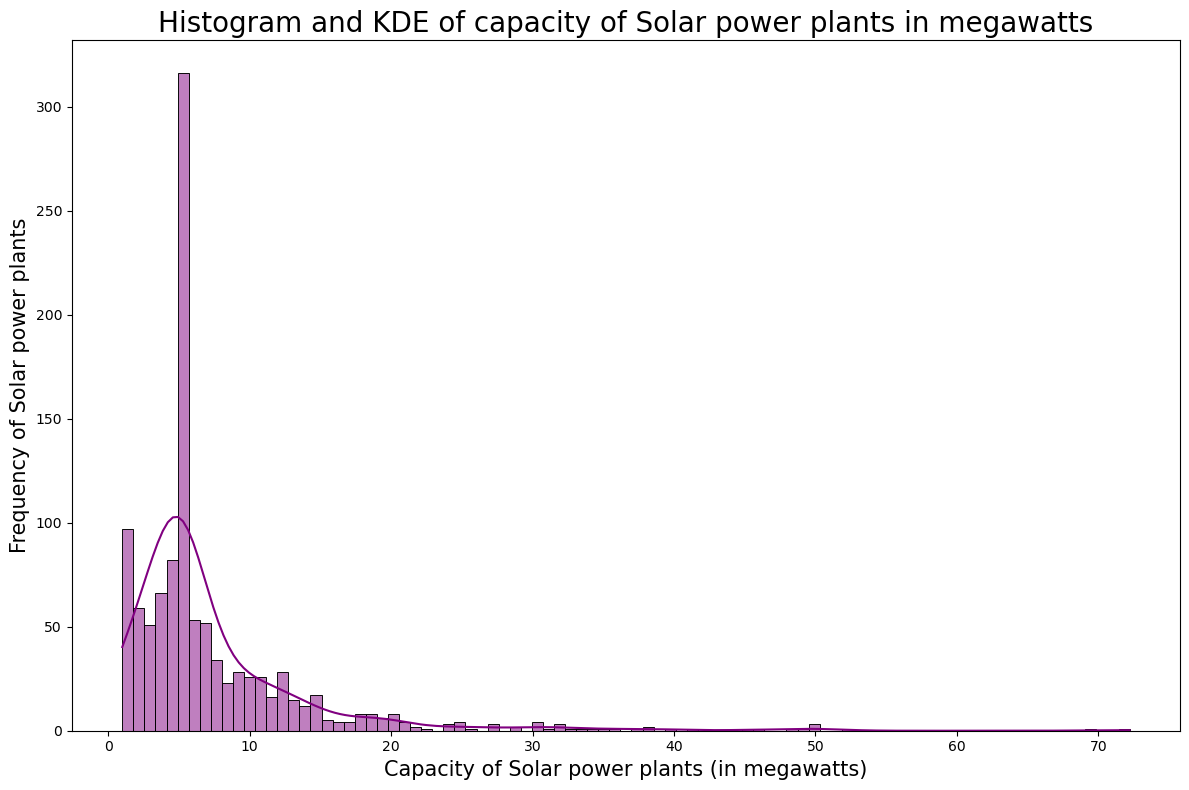

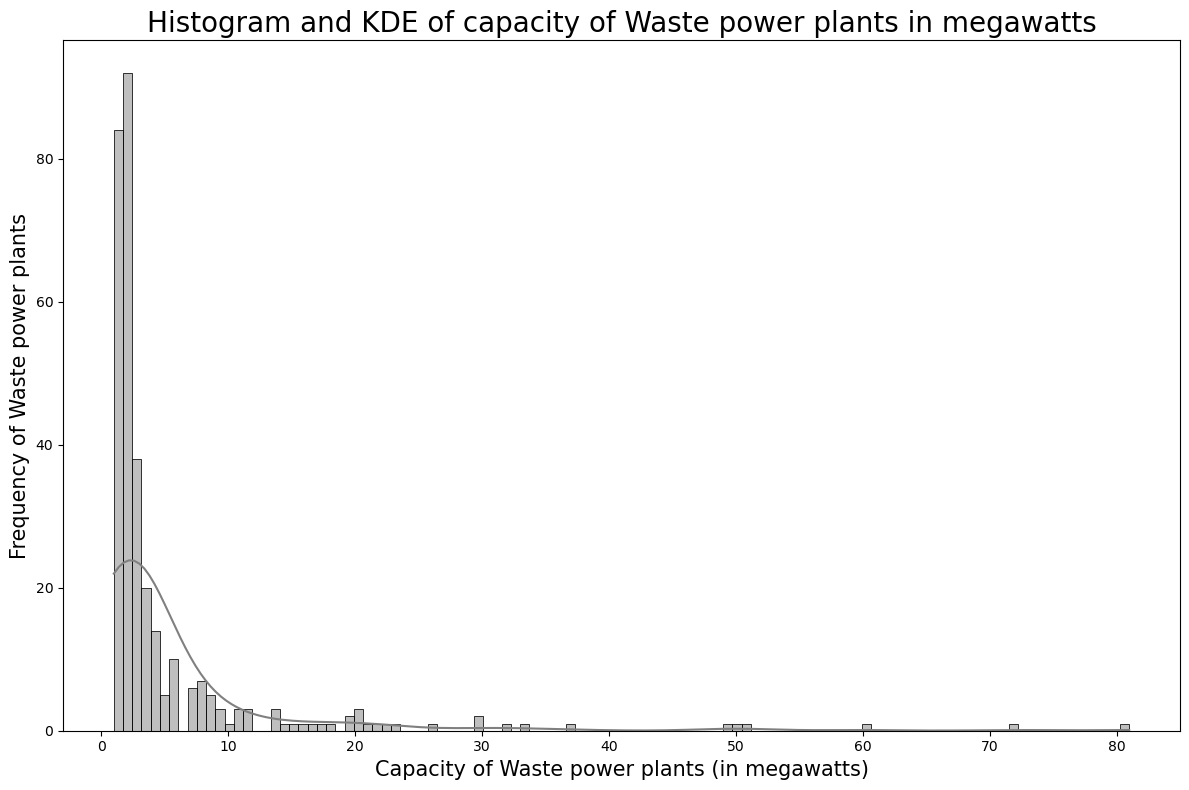

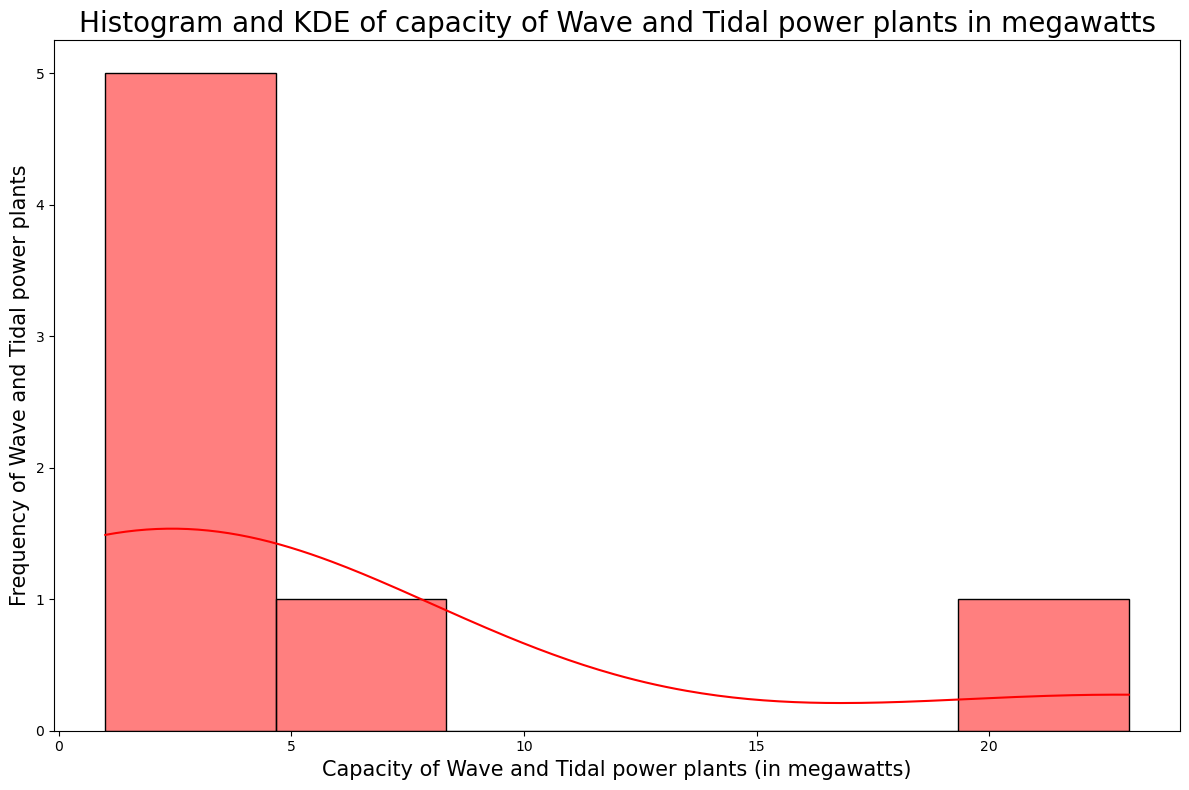

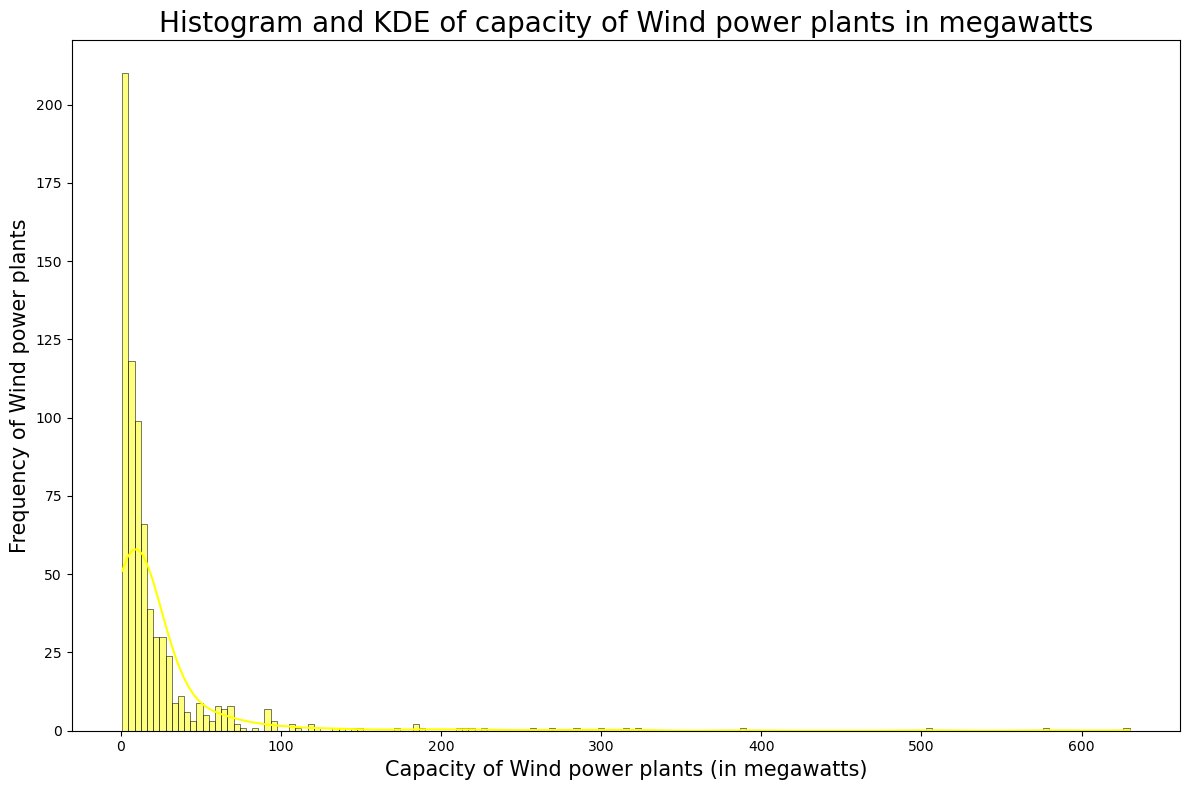

In [16]:
# Defining a list of primary fuels that we intend to draw their histograms and KDEs.
check_fuel = [
    'Biomass',
    'Cogeneration',
    'Gas',
    'Hydro',
    'Oil',
    'Solar',
    'Waste',
    'Wave and Tidal',
    'Wind',
]

# Drawing histograms (and KDEs) of the capacity of power plants for each primary fuel separately.
for fuel_type, color in zip(check_fuel, colors):
    # Draw histogram and kde of capacity with the specified colour.
    hist_kde_plot(fuel_type, color)

<div class="alert alert-block alert-success">

Since the frequencies of the extreme cases in the tail are low, and it is possible to have power plants with those capacities, we will leave the data as it is. Nevertheless, to become sure, we will investigate the top three values of the following primary fuels:
- Biomass
- Hydro

In [17]:
fuel_type = 'Biomass'
power_plants_df.loc[
    (power_plants_df.primary_fuel == fuel_type) &
    (power_plants_df.country_long == 'United Kingdom')
].sort_values('capacity_mw', ascending=False).head(n=3)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
19124,GBR,United Kingdom,Ferrybridge Multi-fuel,GBR0000116,79.0,53.7164,-1.2819,Biomass,NaN,NaN,...,https://www.gov.uk/government/collections/rene...,UK Renewable Energy Planning Database,1076625,NaN,NaN,NaN,NaN,NaN,NaN,1372.417887
19471,GBR,United Kingdom,Iggesund Paperboard CHP Plant,GBR0000047,49.0,54.6640,-3.5473,Biomass,NaN,NaN,...,https://www.gov.uk/government/collections/rene...,UK Renewable Energy Planning Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,851.246537
20396,GBR,United Kingdom,Snetterton Biomass Plant,GBR0000185,44.2,52.4791,0.9544,Biomass,NaN,NaN,...,https://www.gov.uk/government/collections/rene...,UK Renewable Energy Planning Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,767.859121


In [18]:
fuel_type = 'Hydro'
power_plants_df.loc[
    (power_plants_df.primary_fuel == fuel_type) &
    (power_plants_df.country_long == 'United Kingdom')
].sort_values('capacity_mw', ascending=False).head(n=3)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
18988,GBR,United Kingdom,Dinorwig,GBR1000151,1800.0,53.1181,-4.1032,Hydro,NaN,NaN,...,https://www.gov.uk/government/collections/dige...,GEODB,1017049,NaN,NaN,NaN,NaN,NaN,NaN,3828.909206
18924,GBR,United Kingdom,Cruachan,GBR1000455,440.0,56.3940,-5.1150,Hydro,NaN,NaN,...,https://www.gov.uk/government/collections/dige...,GEODB,1028366,NaN,NaN,NaN,NaN,NaN,NaN,935.955584
19126,GBR,United Kingdom,Ffestiniog,GBR1000152,360.0,52.9807,-3.9686,Hydro,NaN,NaN,...,https://www.gov.uk/government/collections/dige...,GEODB,1017050,NaN,NaN,NaN,NaN,NaN,NaN,765.781841


<div class="alert alert-block alert-success">

Checking the respective website for the quarterly Renewable Energy Planning Database (https://www.gov.uk/government/publications/renewable-energy-planning-database-monthly-extract), and 
(https://www.gov.uk/government/collections/digest-of-uk-energy-statistics-dukes),
and taking into account the estimated generation (in gigawatt hours), we find that the values are correct. In fact, the 2023 data show higher capacities, but since we only have the solar energy potential for 2017, we have not used those data points.

<div class="alert alert-block alert-success">

## 3.2. Coordinates (Longitude and Latitude)
For drawing the power plants on the map we need to convert the coordinates to points. 
This is done by creating a geo data frame that adds a geometry column to the existing columns with POINT objects.

In [19]:
# Creating the relative GeoPandas geodataframe with POINTs as geometry 
# from the longitude and latitude attributes of each data point.
# Since crs=4326 is used for the solar potential, we set the coordinate reference system to 'EPSG:4326'
UK_power_plant_geo_data = gpd.GeoDataFrame(
    UK_power_plants_df, 
    geometry=gpd.points_from_xy(UK_power_plants_df.longitude, UK_power_plants_df.latitude),
).set_crs('EPSG:4326')

# Showing the 
UK_power_plant_geo_data.head()

,country_long,name,primary_fuel,capacity_mw,latitude,longitude,geometry
0,United Kingdom,14 Tullywiggan Road,Biomass,1.000000,54.622101,-6.7398,POINT (-6.73980 54.62210)
1,United Kingdom,289 Finvoy Road,Solar,5.900000,54.963799,-6.4930,POINT (-6.49300 54.96380)
2,United Kingdom,30 Acres,Solar,4.965000,53.206200,-1.1968,POINT (-1.19680 53.20620)
3,United Kingdom,A C Shropshire (Farm AD),Biomass,2.500000,52.585999,-1.2375,POINT (-1.23750 52.58600)
4,United Kingdom,A'Chruach,Wind,42.599998,56.152802,-5.3102,POINT (-5.31020 56.15280)


<div class="alert alert-block alert-success">

## 3.3. Loading the Countries Lowres Geo Dataset
For country boundaries, we could have used the 'naturalearth_lowres' dataset from the pre-existing datasets (gpd.datasets.available). Nevertheless, since it raises a warning that it will be removed in GeoPandas 1.0. we use the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

In [20]:
# Get file source of GeoPanda data set.
countries_file_path = "data/ne_110m_admin_0_countries"
# In case we want to use the 'naturalearth_lowres' dataset:
# countries_file_path = gpd.datasets.get_path('naturalearth_lowres')

# Calling GeoPandas read_file() to load the data set file, and assign it to a variable called "world_data".
world_data = gpd.read_file(countries_file_path).to_crs(4326)

UK_country = world_data.loc[world_data['ADMIN']=="United Kingdom"]
# In case we want to use the 'naturalearth_lowres' dataset:
# UK_country = world_data.loc[world_data['name']=="United Kingdom"]

# Show the UK_country geopandas data frame.
UK_country

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
143,Admin-0 country,1,2,United Kingdom,GB1,1,2,Country,1,United Kingdom,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54..."


In [21]:
# Extracting primary fuels and building a draft dictionary, named fuel_color_map.
fuel_color_map = {}
for fuel_type in UK_power_plants_df.primary_fuel.unique():
    fuel_color_map[fuel_type] = 'a'

fuel_color_map

{'Biomass': 'a',
 'Solar': 'a',
 'Wind': 'a',
 'Coal': 'a',
 'Gas': 'a',
 'Hydro': 'a',
 'Waste': 'a',
 'Oil': 'a',
 'Nuclear': 'a',
 'Wave and Tidal': 'a',
 'Cogeneration': 'a'}

In [22]:
# Define a color map for primary fuels by replacing desired colours for the draft fuel_color_map dictionary.
fuel_color_map = {
    'Biomass': 'brown',
    'Solar': 'orange',
    'Wind': 'gray',
    'Coal': 'black',
    'Gas': 'blue',
    'Hydro': 'green',
    'Waste': 'yellow',
    'Oil': 'green',
    'Nuclear': 'purple',
    'Wave and Tidal': 'red',
    'Cogeneration': 'pink'
}

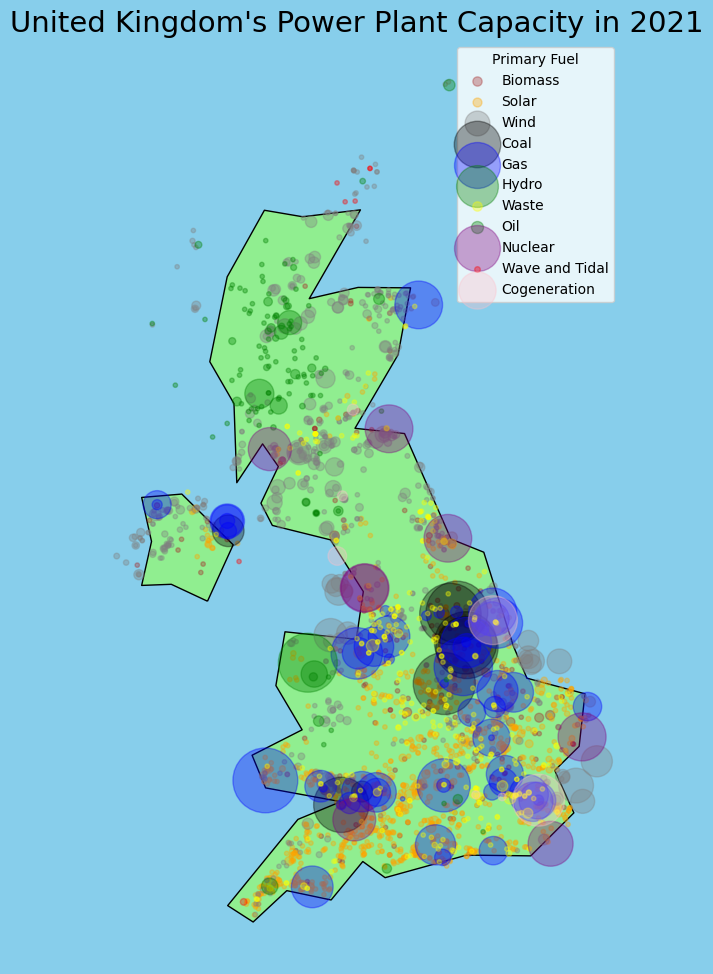

In [23]:
# Creating a figure with one ax in it, and setting its size.
fig, ax = plt.subplots(figsize=(16, 12))

# Setting the face color of the figure to sky blue to represent water.
fig.patch.set_facecolor('skyblue')

# Setting the title of the ax.
ax.set_title("United Kingdom's Power Plant Capacity in 2021", fontsize=21)

# Removing the coordinates off the ax.
ax.set_axis_off()

# Showing the map of the UK multi-polygon.
base = UK_country.plot(ax=ax, color='lightgreen', edgecolor='black', categorical=False)

# Plotting each category separately.
for fuel, color in fuel_color_map.items():
    subset = UK_power_plant_geo_data[UK_power_plant_geo_data['primary_fuel'] == fuel]
    base.scatter(
        # We could have also used 'longitude'.
        subset.geometry.x,\
        # We could have also used 'latitude'.
        subset.geometry.y,
        # To avoid depicting very small points, for power plants with very small capacities, 
        # if the capacity is less than 10 MW, use 10 for the size, otherwise use the capacity itself.
        s=np.where(subset['capacity_mw'] < 10, 10, subset['capacity_mw']),
        # Set the color to the defined colour in the fuel_color_map dictionary.
        c=color,
        # Assign a label in the legend for the respective primary fuel.
        label=fuel,
        # Make the point somewhat transparent for better representaion.
        alpha=0.35,
    )

# Set the legend title, determine its location, and show the legend.
ax.legend(title='Primary Fuel', loc='upper right')

# Show the plot.
plt.show()


<div class="alert alert-block alert-success">

By the above plot we find that the latitude and longitude values for the power plants are not within the range given by the borders (multi-polygons), even after making sure that both coordinate reference systems are set to  EPSG:4326.
    
This was also detectable when we ran <code>UK_power_plants_df.describe()</code>, looking at the minimum and maximum values of the longitude and latitude attributes, and being compared to the minimum and maximum values of <code>UK_country.boundary</code>.

In [24]:
# Obtaining the minimum and maximum values of longitude and latitude corresponding to the power plants.
UK_power_plants_df[['longitude', 'latitude']].aggregate([min, max])

,longitude,latitude
min,-8.0930,50.046501
max,1.9284,60.192402


In [25]:
# Obtaining the minimum and maximum longitude and latitude of the UK borders, 
# brought in the 'naturalearth_lowres' dataset.
UK_country.boundary.bounds

# Also attainable by the following:
# UK_country.total_bounds
# and 
# UK_power_plant_geo_data.total_bounds

,minx,miny,maxx,maxy
143,-7.572168,49.96,1.681531,58.635


<div class="alert alert-block alert-success">

One solution would be to filter out the points that don't lie within the boundaries specified by 'UK_country', as the following:

In [26]:
# Spatial joining of the UK_power_plant_geo_data and UK_country based on their geometry.
UK_power_plants = gpd.sjoin(
    left_df=UK_power_plant_geo_data, 
    right_df=UK_country, 
    how='inner', 
    predicate='intersects', 
)[['name', 'primary_fuel', 'capacity_mw', 'geometry']]

# Showing the first five rows of UK_power_plants
UK_power_plants.head()

,name,primary_fuel,capacity_mw,geometry
0,14 Tullywiggan Road,Biomass,1.000000,POINT (-6.73980 54.62210)
1,289 Finvoy Road,Solar,5.900000,POINT (-6.49300 54.96380)
2,30 Acres,Solar,4.965000,POINT (-1.19680 53.20620)
3,A C Shropshire (Farm AD),Biomass,2.500000,POINT (-1.23750 52.58600)
4,A'Chruach,Wind,42.599998,POINT (-5.31020 56.15280)


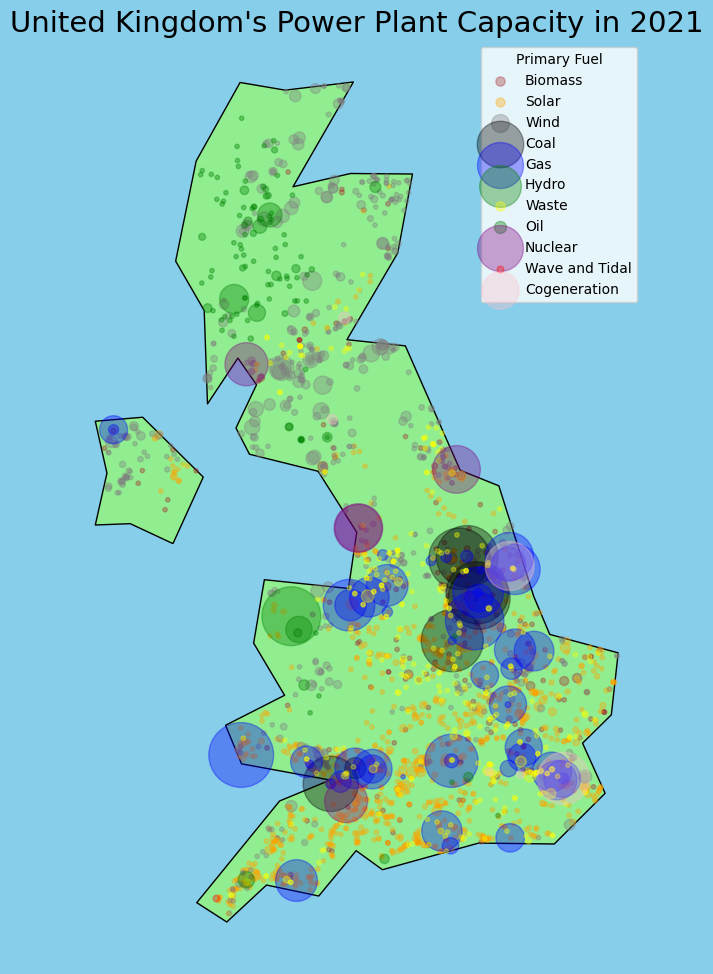

In [27]:
# Showing the filtered Solar Power Plants that fall within the boundaries defined by UK_country.
# Creating a figure with one ax in it, and setting its size.
fig, ax = plt.subplots(figsize=(16, 12))

# Setting the face color of the figure to sky blue.
fig.patch.set_facecolor('skyblue')

# Setting the title of the ax.
ax.set_title("United Kingdom's Power Plant Capacity in 2021", fontsize=21)

# Removing the coordinates off the ax.
ax.set_axis_off()

# Showing the map of the UK multi-polygon.
base = UK_country.plot(ax=ax, color='lightgreen', edgecolor='black', categorical=False)

# Plotting each category separately.
for fuel, color in fuel_color_map.items():
    subset = UK_power_plants[UK_power_plants['primary_fuel'] == fuel]
    base.scatter(
        subset.geometry.x,
        subset.geometry.y,
        s=np.where(subset['capacity_mw'] < 10, 10, subset['capacity_mw']),
        c=color,
        label=fuel,
        alpha=0.35,
    )

# Set the legend title and show the legend
ax.legend(title='Primary Fuel', loc='upper right')

plt.show()

<div class="alert alert-block alert-success">

However, if we take a look at the google map 
(https://www.google.com/maps/@55.5334302,-2.1200978,5.5z?entry=ttu) 
we realise that there are some islands that have not been included in the countries lowres for the UK's multi-ploygon!

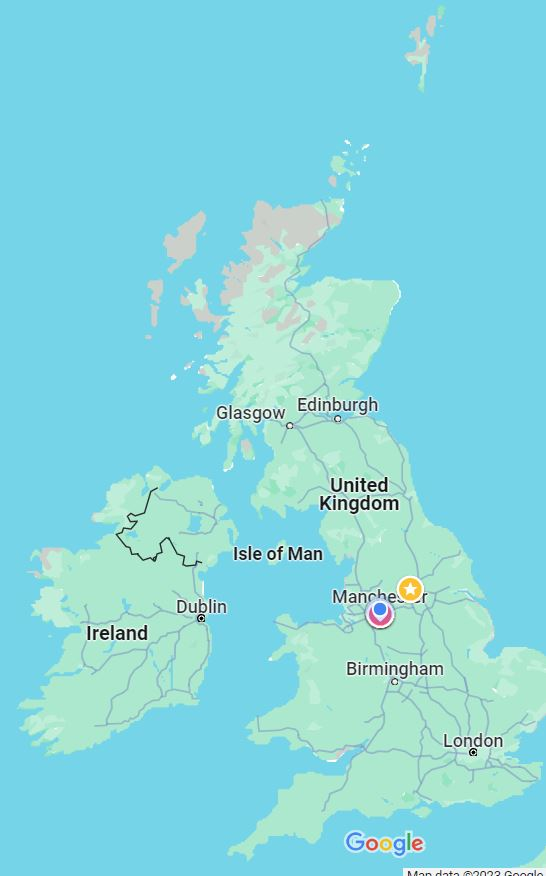

<div class="alert alert-block alert-success">

This can be assured by the following code, which indicates there are only two polygons in the desired multi-polygon, and the other islands are ignored.

In [28]:
UK_country.geometry.explode(index_parts=True)

143  0    POLYGON ((-6.19788 53.86757, -6.95373 54.07370...
     1    POLYGON ((-3.09383 53.40455, -3.09208 53.40444...
Name: geometry, dtype: geometry

<div class="alert alert-block alert-success">

Based on the above analysis we don't find any problem in the longitude and latitude attributes of the power plant data. However, the above analysis made us cautious that we cannot mask the raster data regarding the solar potential irradiation based on the UK_boundaries, obtained from the 'naturalearth_lowres' dataset. Although most of the outlying plants are all in the northern part of the country where PVOUT should be weak, essentially.

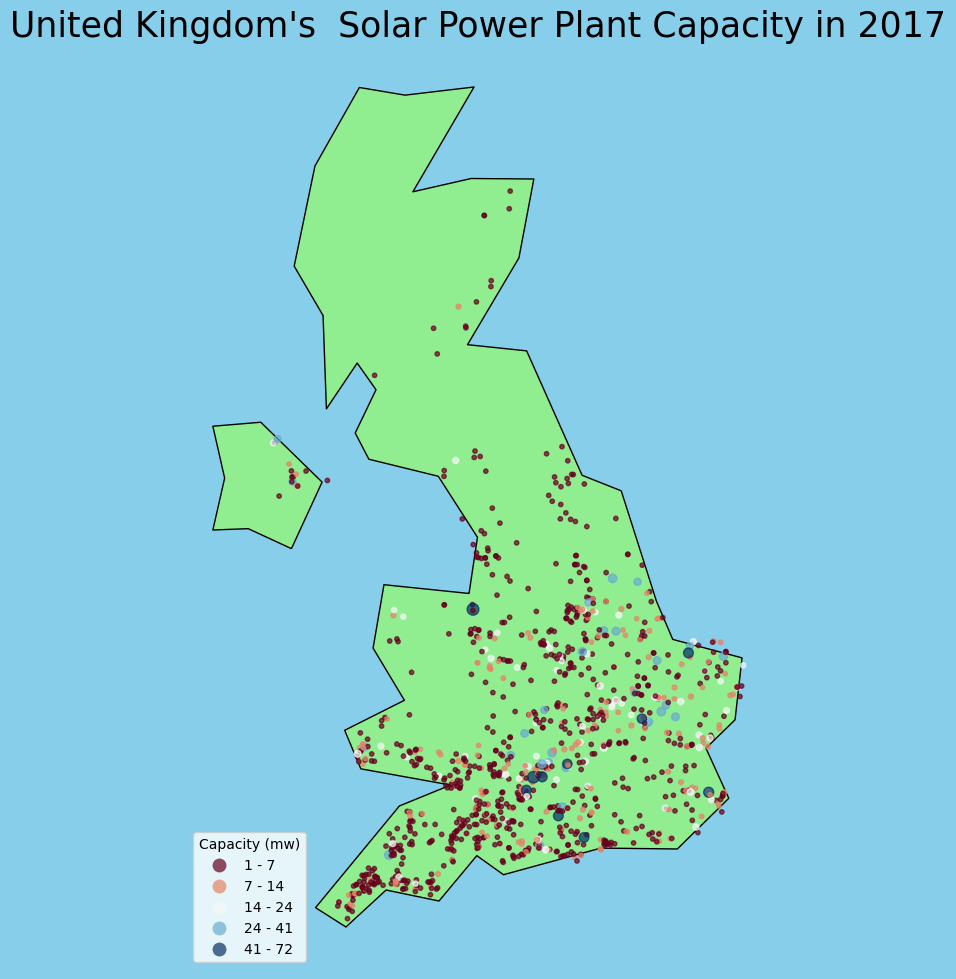

In [29]:
# Restricting the primary fuel of the power plants to 'Solar', and deonstrating the map.
# Joining the UK_power_plant_geo_data and UK_country absed on their geometry.
UK_power_plants = gpd.sjoin(
    left_df=UK_power_plant_geo_data.loc[UK_power_plant_geo_data.primary_fuel=='Solar'], 
    right_df=UK_country, 
    how='left', 
    predicate='intersects', 
)[['name', 'primary_fuel', 'capacity_mw', 'geometry']]


# Show map plot for capacity for each power plant within UK
# Creating a figure with one ax in it, and setting its size.
fig, ax = plt.subplots(figsize=(16, 12))
# Setting the face colour of the figure to sky blue.
fig.patch.set_facecolor('skyblue')
# Setting the title of the ax.
ax.set_title('United Kingdom\'s  Solar Power Plant Capacity in 2017', fontsize=25)
# Removing the coordinates off the ax.
ax.set_axis_off()

# Showing the map of the UK multi-polygon.
UK_country.plot(
    ax=ax,
    color='lightgreen', 
    edgecolor='black',
    categorical=False
)

# Depicting the power plants 
UK_power_plants.plot(
    ax=ax,
    column='capacity_mw',
    categorical=True,
    cmap='RdBu',
    alpha=0.7,
    scheme='fisher_jenks',
    k=5,
    legend=True,
    markersize=np.where(UK_power_plants['capacity_mw'] < 10, 10, UK_power_plants['capacity_mw']),
    legend_kwds={'loc': 'lower left'}
)

leg = ax.get_legend()
leg.set_title('Capacity (mw)')
for t in leg.get_texts():
  ranges = t.get_text().split(',')
  label = '{:,.0f} - {:,.0f}'.format(float(ranges[0].strip()), float(ranges[1].strip()))
  t.set_text(label)

plt.show()

<div class="alert alert-block alert-success">

Filtering the 'Solar' power plants, we figure out that all of them lie in the provided boundaries. Therefore, we would have no problem with the given data.

<div class="alert alert-block alert-success">
<a id="4-SolarPlantVisualisation"></a>
    
# 4. Visualisation of Solar Power Plants on the Solar Irradiation Potential Map

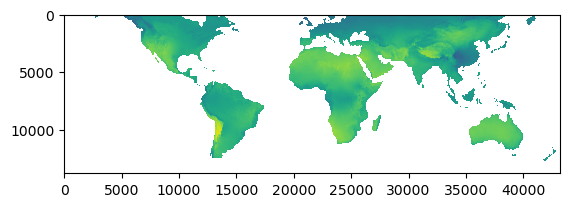

In [30]:
# Defining the path to the PVOUT file, regarding the potential solar irradiation
PVOUT_file_path = r'data\World_PVOUT_GISdata_LTAy_DailySum_GlobalSolarAtlas_GEOTIFF\PVOUT.tif'

# Note: Opening a raster file (if enough RAM is available and its successful!) would take time.
# Since we are using the img file until the end, we will close it only then.
# We avoid using context manager for manging resources, as "with open('file_path', 'w') as file:", 
# since we have to indent the entire code under 'with', and bring all the code snippets in one cell.
# 'rasterio.io.DatasetReader' is an instance of the rasterio.io.DatasetReader class.
img = rasterio.open(PVOUT_file_path)

# 'image' is a numpy array.
image = img.read()

# The shape of 'image' depends on the number of layers in the raster, the height, and width of the image. 
# In our case image.shape==(1, 13800, 43200), which is realisable by the axes.
# Since we only have one layer (it is not RGB), the
# matplotlib.pyplot.imshow() function renders the 2D image as a pseudocolor image.
plt.imshow(image[0])

# Showing the plot.
plt.show()

In [31]:
# Obtaining some meta-data regarding the 'img' raster file.
print(img.meta)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 43200, 'height': 13800, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.008333333333333333, 0.0, -180.0,
       0.0, -0.008333333333333333, 60.0)}


<div class="alert alert-block alert-success">

The data type, shape (count indicates the number of layers (bands)), crs (coordinate reference system), etc. can be attained.
crs is already 4326, which is the same as UK_country, nevertheless, 
it has to be noted that crs of the rater file 'img' cannot be changed. 
Therefore, to make sure that the crs of two datasets coincide, just as shp files, run the following code:

<code>UK_country.to_crs(img.crs);</code>

In [32]:
# Extracting the value of the geometry column of the UK_country geopandas.geodataframe's GeoDataFrame, 
# which has only one row.
geoms = UK_country.geometry.values

# Making a mask GeometryArray from rasterio.mask import mask.
# out_img contains the values in the form of a numpy ndarray, and
# out_transform holds the coefficients for the respective affine transformation (put simply, a linear mapping).
out_img, out_transform = mask(img, [geoms[0]], crop=True)

In [33]:
# Get number of bands (layers).
num_bands = img.count
print(f'Number of bands: {num_bands}')

# Read the raster values.
image = img.read()

# Closing the raster file since we didn't use the context manager.
img.close()

Number of bands: 1


In [34]:
# Now, depending on the number of bands, you can access the values accordingly
# For example, if it's a single-band raster:
print("The values in the raster image are as following:")
if num_bands == 1:
    values = image[0]
    print(values)

print()

print("Location of non-null values:")
print(np.where(~np.isnan(values)))

print("The non-null values:")
print(values[np.where(~np.isnan(values))])

print()

# Obtaining the range of intensities, which is necessary for drawing a colorbar, and normalising.
# Since we have np.nan (null) values, we should use special max and min.
print("The maximum value for potential solar irradiation is:", np.nanmax(values))
print("The minimum value for potential solar irradiation is:", np.nanmin(values))

print()

# The coordinate in the image with highest and lowest potential solar power.
print(
    'Coordinates of the point with maximum potential solar irradiation:', 
    np.unravel_index(np.nanargmax(values), shape=values.shape)
)

The values in the raster image are as following:
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]

Location of non-null values:
(array([    2,     2,     2, ..., 13784, 13784, 13784], dtype=int64), array([ 1515,  1516,  1517, ..., 40656, 40657, 40658], dtype=int64))
The non-null values:
[2.862 2.865 2.868 ... 2.1   2.101 2.101]

The maximum value for potential solar irradiation is: 6.767
The minimum value for potential solar irradiation is: 0.0

Coordinates of the point with maximum potential solar irradiation: (10507, 13405)


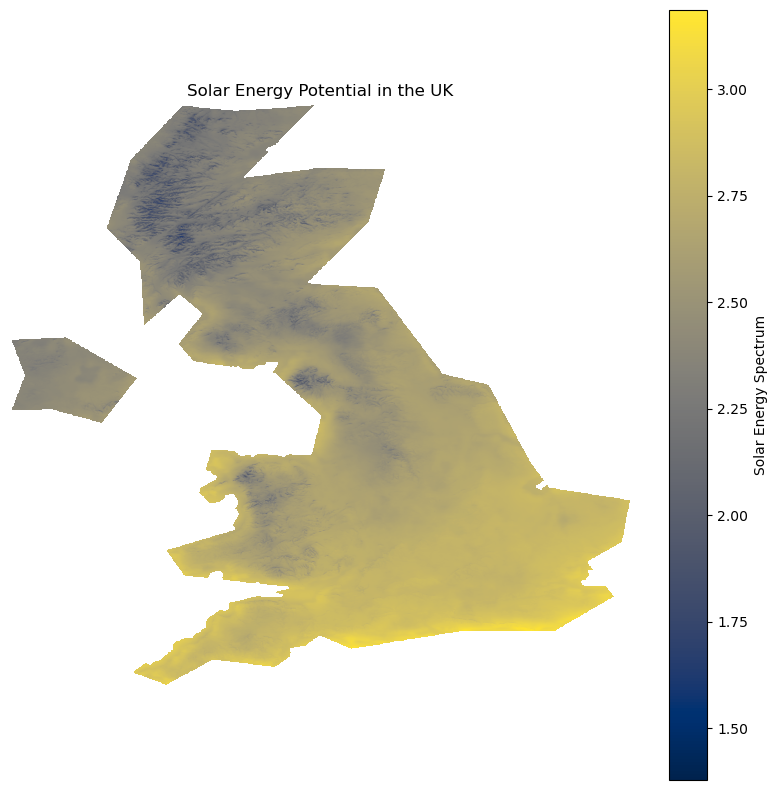

In [35]:
# Plotting the solar power potential in the UK.
fig, ax = plt.subplots(figsize=(10, 10))

# The cividis (or viridis) color maps can be used for compatibility with CVD needs.
# It has to be mentioned that we had imported 'show' previously, using 'from rasterio.plot import show'.
# transform=out_transform maps pixel coordinates to the corresponding real-world spatial coordinates, 
# defined by the affine out_transform obtained by mask.
image_plot = show(out_img[0], ax=ax, cmap='cividis', transform=out_transform)

# Setting title of the plot.
plt.title('Solar Energy Potential in the UK')

# Dropping both the axes.
ax.set_axis_off()

# Adding colorbar legend.
# Since show does not directly return a mappable object that can be used for the colorbar, 
# image_plot.get_images()[0] is used.
cbar = plt.colorbar(image_plot.get_images()[0], ax=ax, orientation='vertical')
# Set the label for the colorbar
cbar.set_label('Solar Energy Spectrum') 

# Showing the plot.
plt.show()


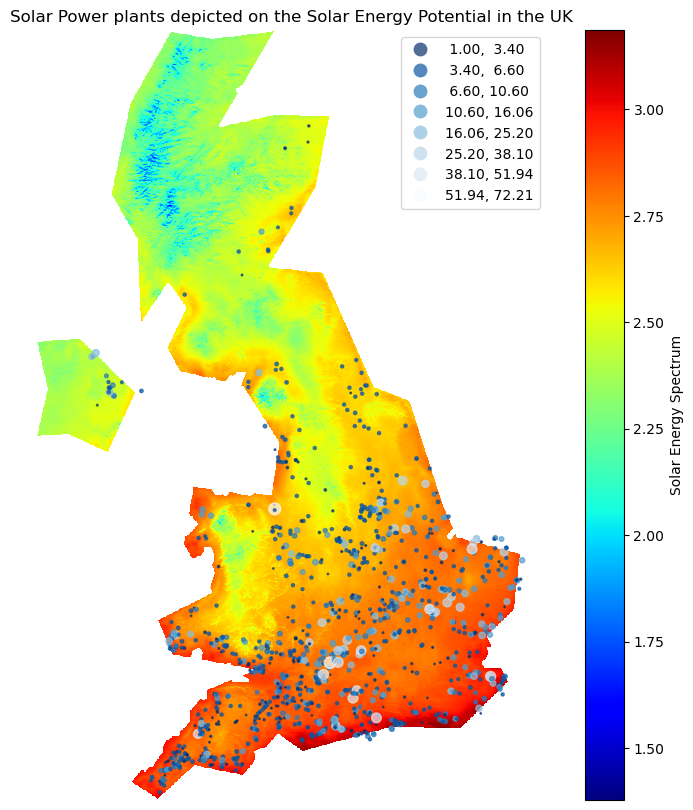

In [36]:
# Plotting the Solar Power plants on the solar power potential in the UK.
fig, ax = plt.subplots(figsize=(10, 10))

# The colormap is set to 'jet' since it is more in compliance with the sense people have about irradiation.
base = show(out_img[0], ax=ax, cmap='jet', transform=out_transform)

UK_power_plants.plot(
    ax=base,
    column='capacity_mw',
    categorical=True,
    # The colormap is set to 'Blue_r', since we have chosen 'jet' as the color map for the base.
    cmap='Blues_r',
    alpha=0.7,
    scheme='fisher_jenks',
    # k indicates the number of classes that the capacity in megawatts is divided to.
    k=8,
    # Show the legend, corresponding to capacities.
    legend=True,
    # The size of each circle demonstrates the capacity as well.
    markersize=UK_power_plants['capacity_mw'], 
    legend_kwds={'loc': 'upper right'}
)

# Adding colorbar legend.
cbar = plt.colorbar(base.get_images()[0], ax=ax, orientation='vertical')
# Set the label for the colorbar
cbar.set_label('Solar Energy Spectrum') 

plt.title('Solar Power plants depicted on the Solar Energy Potential in the UK')
ax.set_axis_off()
plt.show()

<div class="alert alert-block alert-success">

# 5. Comparison Between Solar Energy Potential and Capacity of Solar Power Plants
In this section we compare the values of the solar energy potentials to the capacity of the existing solar power plants.

<div class="alert alert-block alert-success">

## 5.1. Solar Energy Potential

In [37]:
# Removing the dimension with size one from the out_img numpy ndarray, corresponding to img.count==1.
# We coud have also used reshape, or resize (with an in place assignment).
irradiation_arr = out_img.squeeze()

# Checking the shape of irradiation_arr numpy ndarray.
irradiation_arr.shape

(1042, 1111)

In [38]:
def average_neighbors(arr, new_shape):
    """This function receives a 2D numpy ndarray, arr, and a new 2D shape, new_shape, 
    which should not be larger than the shape of the original array, 
    and returns a grid (array) that contains the mean of the cells that fall in each new cell."""
    
    new_rows, new_cols = new_shape
    rows, cols = arr.shape
    
    if not((new_rows <= rows) and (new_cols <= cols)):
        raise ValueError("The given new shape must be smaller than or equal to the original shape")
    
    row_factor = rows // new_rows
    col_factor = cols // new_cols
    
    averaged_arr = np.zeros((new_rows, new_cols), dtype=np.float32)
    
    for i in range(new_rows):
        for j in range(new_cols):
            
            # Defining the scope of the cells that fall in the new cell
            start_row, start_col = i * row_factor, j * col_factor
            end_row, end_col = (i + 1) * row_factor, (j + 1) * col_factor
            
            # Extracting the subarray from the oroginal array related to the new cell.
            subarray = arr[start_row:end_row, start_col:end_col]
            
            # Aggregating neighboring cells by their average, without treating null values as 0.
            averaged_arr[i, j] = np.nanmean(subarray)
            
    return averaged_arr


In [39]:
# Specify the new shape (10, 11) for the aggregated array.
# In case finer grained maps are needed, increase the dimensions of the grid.
new_shape = (10, 11)

# Getting the averaged irradiation array.
average_irradiation = average_neighbors(irradiation_arr, new_shape)


In [40]:
# Setting grid_rows and grid_cols to the desired grid dimensions.
grid_rows, grid_cols = new_shape

# Calculating bounding box of the GeoDataFrame.
minx, miny, maxx, maxy = UK_power_plants.total_bounds

# Creating a raster mask using the bounding box and grid dimensions.
transform = rasterio.transform.from_bounds(minx, miny, maxx, maxy, grid_cols, grid_rows)
mask = geometry_mask(UK_power_plants['geometry'], out_shape=(grid_rows, grid_cols), transform=transform, invert=True)

# Initialize the capacity_array array to store the sum of capacity_mw values in each cell
cumulative_capacity_array = np.zeros((grid_rows, grid_cols), dtype=float)

# Iterate over each power plant, adding its capacity to the corresponding cell
for index, row in UK_power_plants.iterrows():
    # Get the row and column indices of the power plant in the grid
    row_idx, col_idx = rasterio.transform.rowcol(transform, row['geometry'].x, row['geometry'].y)

    # Add the capacity to the corresponding cell
    cumulative_capacity_array[row_idx - 1, col_idx - 1] += row['capacity_mw']


In [41]:
# We convert the nan values to zero here, 
# since if we had removed them before the calculations, 
# The mean would have been affected by the zeros.
average_irradiation = np.nan_to_num(average_irradiation, nan=0)
cumulative_capacity_array = np.nan_to_num(cumulative_capacity_array, nan=0)

In [42]:
def standardisation_scaling(arr):
    """This function standardises the values of the given array arr to a scale in [0, 1],
    by subtracting the minimum value from each value and dividing by the range of values."""
    min_val = np.nanmin(arr)
    max_val = np.nanmax(arr)
    scaled_arr = (arr - min_val) / (max_val - min_val)
    return scaled_arr



In [43]:
# Standardisation scaling for both arrays.
standardised_cumulative_capacity = standardisation_scaling(cumulative_capacity_array)
standardised_average_irradiation = standardisation_scaling(average_irradiation)

In [44]:
# Calculating the difference between the potential and actual solar energies.
# Although this is not a correct comparison, 
# and we need to apply some transformations before standardising the values, 
# but considering their maximum values being set to 1, 
# we can achieve a sense of their relation.
# difference = standardised_average_irradiation - standardised_cumulative_capacity

# Because of the difference between the boundaries of the UK and the raster PVOUT, 
# with trial-and-error, we eliminated some points that didn't coincide properly by setting them to zero.
# The 0.82 coefficient is attained after observing the difference heatmap.
difference = \
np.where(
    (standardised_cumulative_capacity<=0.1) & (standardised_average_irradiation>=0.95), 
    0,  
    standardised_average_irradiation - 0.83 * standardised_cumulative_capacity
)

In [45]:
# Due to the difference between the coordinates in the utilised datasets, 
# by inspection, we can see that these points could correspond to sea areas. 
# Therefore, for a cleaner representation, for some points with low difference, 
# we the difference was set to 0. (We actually care about high values in difference)
difference = np.where(difference<=0, 0, difference)

<div class="alert alert-block alert-success">

### 5.2. Visualisation of Standardised Average Irradiation

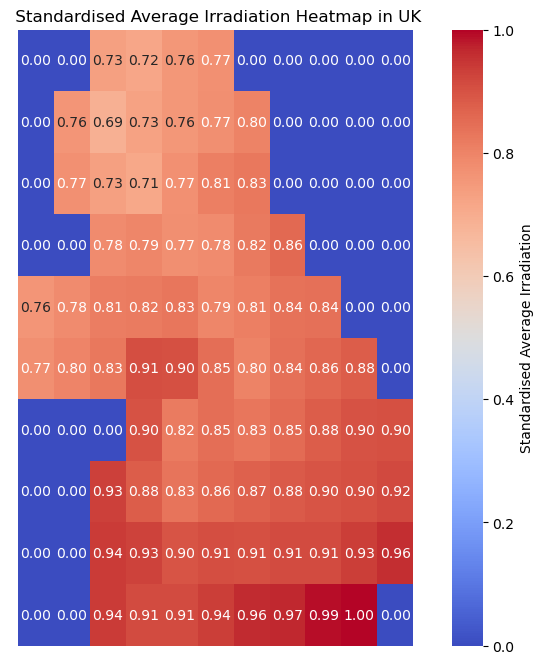

In [46]:
# Setting the ax to base, corresponfing to UK_country.
base = UK_country.plot(figsize=(10, 8))

# Create a heatmap layer on the same plot
sns.heatmap(
    standardised_average_irradiation, 
    cmap='coolwarm', 
    annot=True, 
    fmt=".2f", 
    cbar_kws={'label': 'Standardised Average Irradiation'}, 
    ax=base
)

# Set the plot title
plt.title(' Standardised Average Irradiation Heatmap in UK')
base.set_axis_off()
# Show the plot
plt.show()

<div class="alert alert-block alert-success">

### 5.3. Visualisation of Standardised Cumulative Capacity

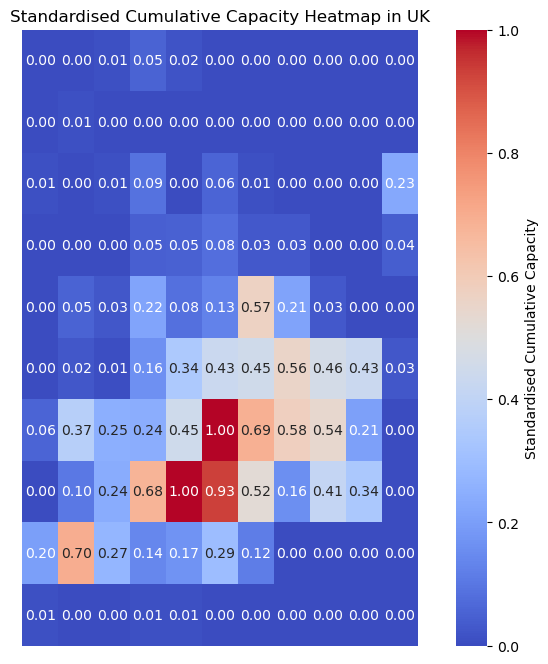

In [47]:
# Setting the ax to base, corresponfing to UK_country
base = UK_country.plot(figsize=(10, 8))

# Create a heatmap layer on the same plot
sns.heatmap(
    standardised_cumulative_capacity, 
    cmap='coolwarm', 
    annot=True, 
    fmt=".2f", 
    cbar_kws={'label': 'Standardised Cumulative Capacity'}, 
    ax=base
)

# Set the plot title
plt.title('Standardised Cumulative Capacity Heatmap in UK')
base.set_axis_off()
# Show the plot
plt.show()

<div class="alert alert-block alert-success">

### 5.4. Visualisation of Difference between Standardised Average Irradiation and Standardised Cumulative Capacity

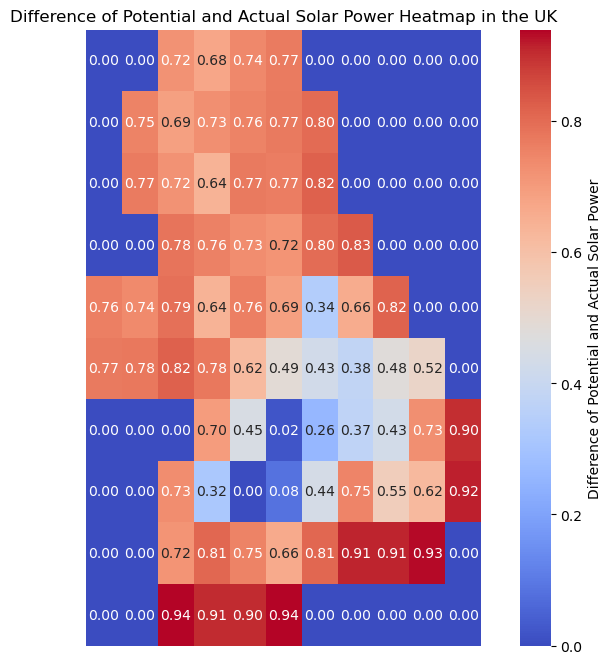

In [48]:
# Setting the ax to base, corresponfing to UK_country.
base = UK_country.plot(figsize=(10, 8))

# Create a heatmap layer on the same plot
sns.heatmap(
    difference, 
    cmap='coolwarm', 
    annot=True, 
    fmt=".2f", 
    cbar_kws={'label': 'Difference of Potential and Actual Solar Power'}, 
    ax=base
)

# Set the plot title
plt.title('Difference of Potential and Actual Solar Power Heatmap in the UK')
base.set_axis_off()
# Show the plot
plt.show()

<div class="alert alert-block alert-success">

# 6. Interpretation and Conclusion

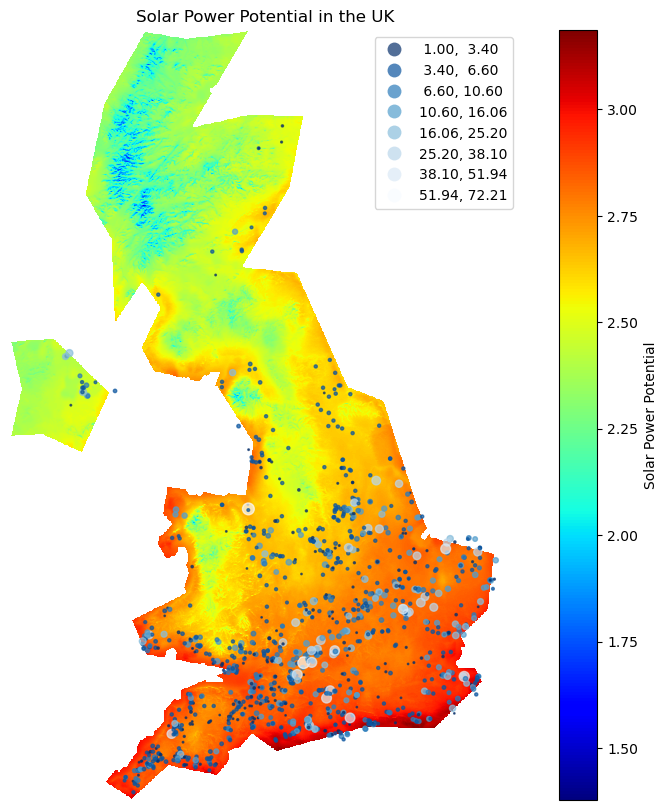

In [49]:
fig, ax = plt.subplots(figsize=(10, 10))

# The colormap is set to 'jet' since it is more in compliance with the sense people have about irradiation.
base = show(out_img[0], ax=ax, cmap='jet', transform=out_transform)

UK_power_plants.plot(
    ax=base,
    column='capacity_mw',
    categorical=True,
    # The colormap is set to 'Blue_r', since we have chosen 'jet' as the color map for the base.
    cmap='Blues_r',
    alpha=0.7,
    scheme='fisher_jenks',
    # k indicates the number of classes that the capacity in megawatts is divided to.
    k=8,
    # Show the legend, corresponding to capacities.
    legend=True,
    # The size of each circle demonstrates the capacity as well.
    markersize=UK_power_plants['capacity_mw'], 
    legend_kwds={'loc': 'upper right'}
)

# Adding colorbar legend.
cbar = plt.colorbar(base.get_images()[0], ax=ax, orientation='vertical')
# Setting the label for the colorbar.
cbar.set_label('Solar Power Potential') 

plt.title('Solar Power Potential in the UK')
ax.set_axis_off()
plt.show()

<div class="alert alert-block alert-success">
    
From the above plot we realise that solar power plants are fairly distributed over palces with the potential to produce solar power. Nevertheless, we can speculate that lower east of England can benefit more from utilisation of solar irradiations.

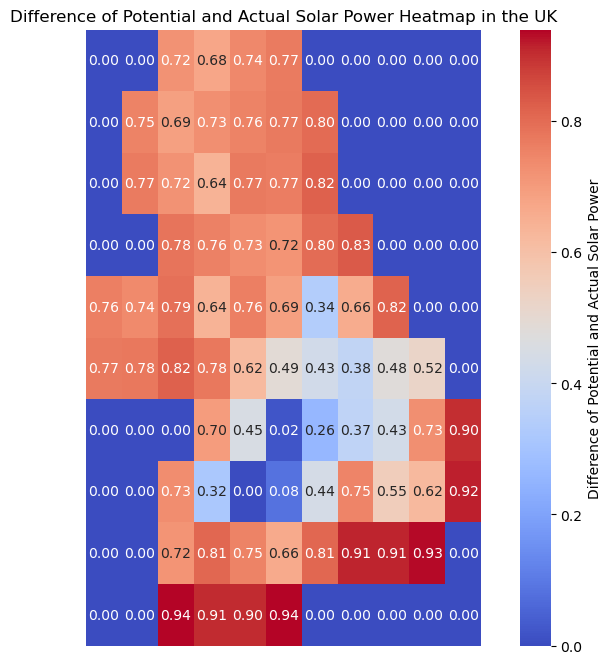

In [50]:
# Setting the ax to base, corresponfing to UK_country.
base = UK_country.plot(figsize=(10, 8))

# Create a heatmap layer on the same plot
sns.heatmap(
    difference, 
    cmap='coolwarm', 
    annot=True, 
    fmt=".2f", 
    cbar_kws={'label': 'Difference of Potential and Actual Solar Power'}, 
    ax=base
)

# Set the plot title
plt.title('Difference of Potential and Actual Solar Power Heatmap in the UK')
base.set_axis_off()
# Show the plot
plt.show()

<div class="alert alert-block alert-success">

Analysing this plot, compared to the lower middle part which corresponds to the points with high solar power capacity and high potential solar power irradiation, we observe that the southern and south-eastern margins of the UK could benefit more from solar power generation, maybe by increasing the capacity of existing ones or by adding new power plants. 
A finer granulated heatmap (attainable by increasing nrows and ncols) can depict more detail, however increasing the number of grids would result in not seeing the annotation numbers.
    
Further feasibility studies (financial, technical, social, ...) are needed for decision making.